In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv(os.path.join(os.getcwd(), 'Data\IMDB-Movie-Data.csv'))
df


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


## Question 1: What is the shape of the dataset (Total rows and total columns)?

In [3]:
print("Total rows: ", df.shape[0])
print("Total columns: ", df.shape[1])

Total rows:  1000
Total columns:  12


In [4]:
df.shape

(1000, 12)

## Question 2: Get overall statistics about the dataset like total rows, total columns, data types of each column and memory requirement.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


## Question 3: Check missing values in the dataset.

In [6]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

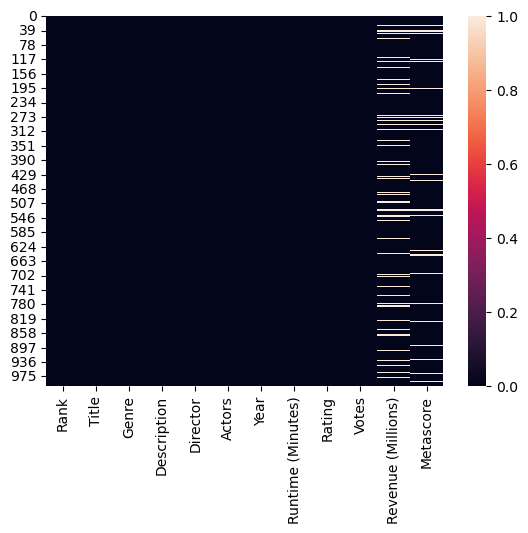

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
# Percentage of missing values
per_missing = (df.isnull().sum()/len(df))*100
per_missing

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

## Question 4: Drop all the missing values in the dataset.

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

## Question 5: Check for duplicated data.

In [11]:
df.duplicated().any()

False

In [12]:
df.drop_duplicates(inplace=True)

## Question 6: Get overall statistics about the dataset.

In [13]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


## Question 7: Display the title of the movie having the runtime greater than or equal to 180 minutes.

In [14]:
df[df['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

## Question 8: In which year there was the highest average voting?

In [15]:
df.groupby('Year')['Votes'].mean().sort_values(ascending=False).round(2)

Year
2012    290861.48
2006    277232.22
2009    267180.58
2008    266580.15
2007    266530.70
2010    261082.93
2011    259254.74
2013    225531.89
2014    211926.88
2015    129512.65
2016     68437.82
Name: Votes, dtype: float64

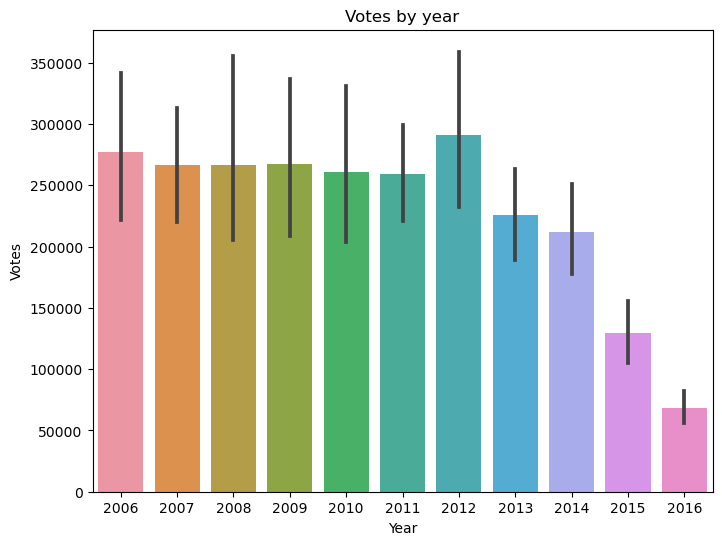

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Year', y='Votes')
plt.title('Votes by year')
plt.show()

## Question 9: In which year there was the highest average revenue?

In [28]:
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False).round(2)

Year
2009    115.74
2012    110.10
2010    105.08
2008     97.53
2011     93.70
2007     93.07
2013     88.08
2006     87.26
2014     85.43
2015     80.73
2016     55.57
Name: Revenue (Millions), dtype: float64

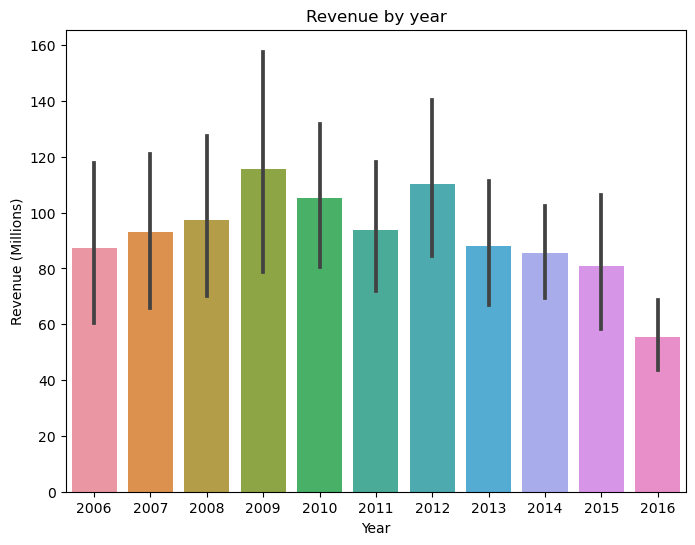

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Year', y='Revenue (Millions)')
plt.title('Revenue by year')
plt.show()

## Question 10: Find the average rating for each director.

In [19]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

## Question 11: Display the top 10 lengthy movie titles and their runtime.

In [20]:
top10_lengthy = df.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']]
top10_lengthy

,Title,Runtime (Minutes)
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170
36,Interstellar,169
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169
425,The Curious Case of Benjamin Button,166
126,Transformers: Age of Extinction,165


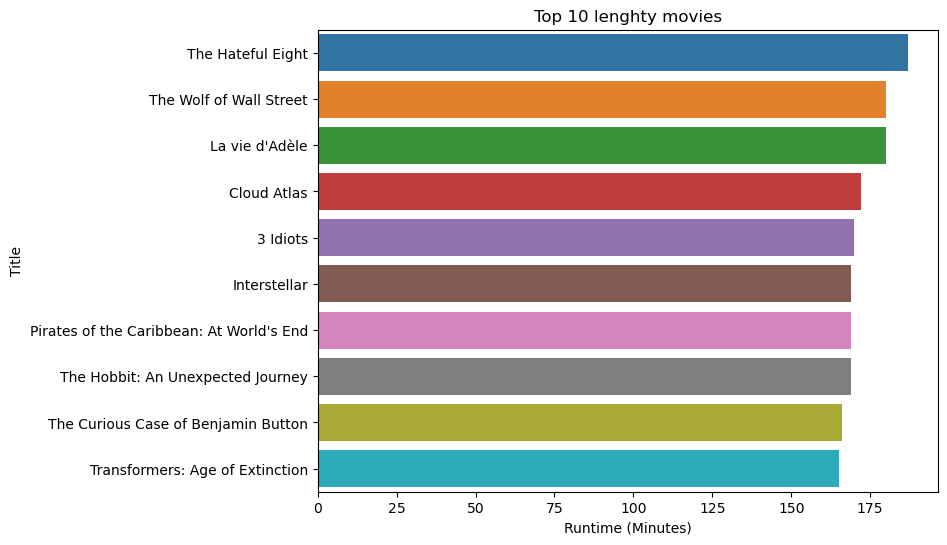

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(data=top10_lengthy, y='Title', x='Runtime (Minutes)', orient='h')
plt.title('Top 10 lenghty movies')
plt.show()

## Question 12: Display number of movies per year.

In [22]:
num_movies = df.groupby('Year')[['Rank']].count().sort_values(by='Rank', ascending= False).reset_index()
num_movies

,Year,Rank
0,2016,198
1,2015,109
2,2014,93
3,2013,84
4,2012,62
5,2010,57
6,2011,57
7,2008,48
8,2009,45
9,2007,44


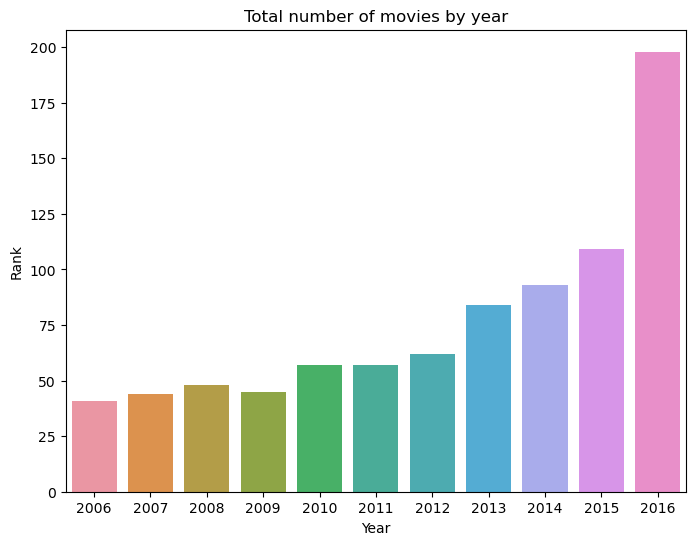

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(data=num_movies, x='Year', y='Rank')
plt.title('Total number of movies by year')
plt.show()

## Question 13: Find the most popular movie title by highest revenue.

In [24]:
print('The movie with the most revenue is:', df[df['Revenue (Millions)'] == df['Revenue (Millions)'].max()]['Title'].values[0])

The movie with the most revenue is: Star Wars: Episode VII - The Force Awakens


## Question 14: Display top 10 highest rated movies titles and their revenues.

In [25]:
top10_ratings = df.nlargest(10, ['Rating'])[['Title', 'Revenue (Millions)', 'Rating']]
top10_ratings

,Title,Revenue (Millions),Rating
54,The Dark Knight,533.32,9.0
80,Inception,292.57,8.8
36,Interstellar,187.99,8.6
96,Kimi no na wa,4.68,8.6
249,The Intouchables,13.18,8.6
64,The Prestige,53.08,8.5
99,The Departed,132.37,8.5
124,The Dark Knight Rises,448.13,8.5
133,Whiplash,13.09,8.5
476,The Lives of Others,11.28,8.5


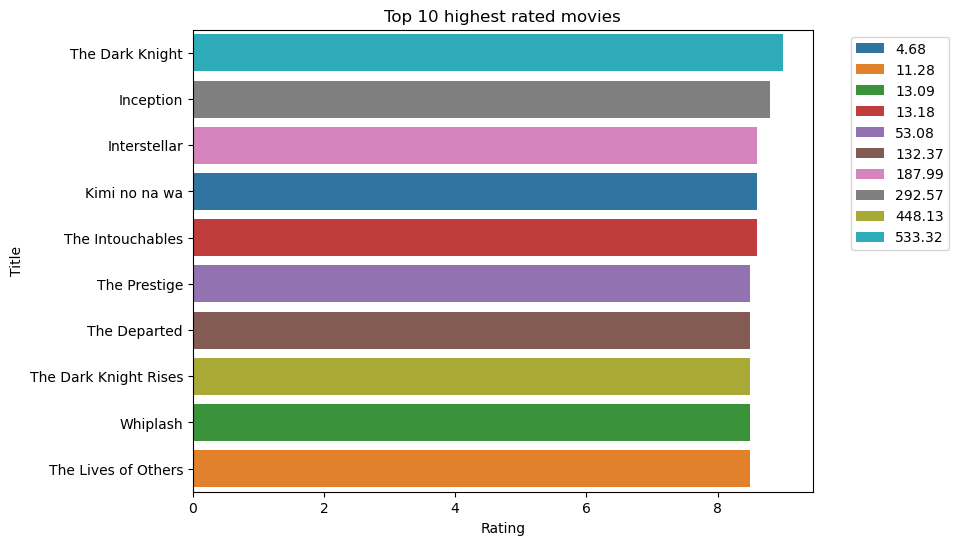

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(data=top10_ratings, x='Rating', y='Title', orient='h', hue='Revenue (Millions)',dodge=False)
plt.title('Top 10 highest rated movies')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2)
plt.show()

## Question 15: Display highest revenue movie titles.

In [35]:
df.sort_values(by='Revenue (Millions)',ascending=False)['Title'].head(10)

50     Star Wars: Episode VII - The Force Awakens
87                                         Avatar
85                                 Jurassic World
76                                   The Avengers
54                                The Dark Knight
12                                      Rogue One
119                                  Finding Dory
94                        Avengers: Age of Ultron
124                         The Dark Knight Rises
578               The Hunger Games: Catching Fire
Name: Title, dtype: object

In [38]:
top10_revneue = df.nlargest(10, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']]
top10_revneue

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


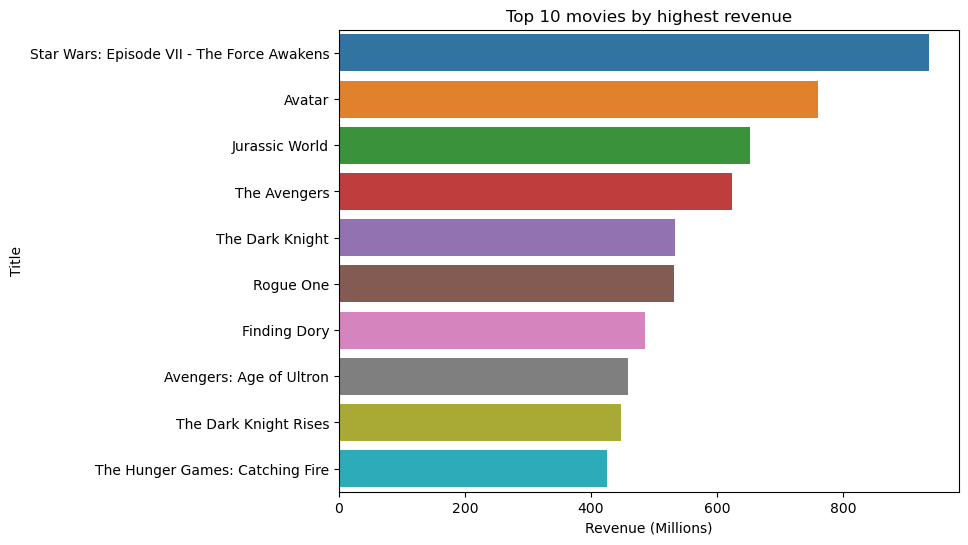

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(data=top10_revneue, x='Revenue (Millions)',y='Title', )
plt.title('Top 10 movies by highest revenue')
plt.show()

## Question 16: Find average ratings of movies year wise.

In [43]:
df.groupby('Year')[['Rating']].mean().sort_values(by='Rating', ascending=False)


,Rating
Year,
2006,7.143902
2007,7.140909
2011,6.945614
2012,6.933871
2009,6.911111
2010,6.894737
2013,6.832143
2014,6.822581
2008,6.708333


## Question 17: Does rating affect the revenue?

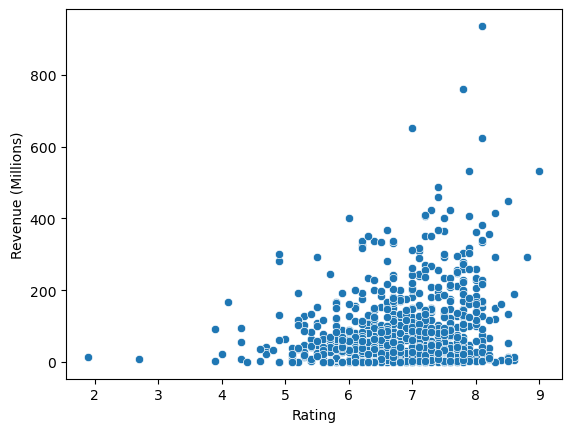

In [54]:
sns.scatterplot(data=df, x='Rating', y='Revenue (Millions)')
plt.show()

## Question 18: Classify movies based on ratings (Excellent, Good and Average).

In [59]:
df['Rating_category'] = df['Rating'].apply(lambda x: 'Excellent' if x > 7.0 else('Good' if x > 6.0 else 'Average'))

In [63]:
# Another way of solving the above problem is following:
def rating(rating):
    if rating > 7.0:
        return 'Excellent'
    elif rating > 6.0:
        return 'Good'
    else:
        return 'Average'

In [64]:
df['Rating'].apply(rating)

0      Excellent
1           Good
2      Excellent
3      Excellent
4           Good
         ...    
993      Average
994         Good
996      Average
997         Good
999      Average
Name: Rating, Length: 838, dtype: object

In [65]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Good
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


## Question 19: Count number of action movies.

In [71]:
print('Total number of action movies are:',len(df[df['Genre'].str.contains('Action', case=False)]))

Total number of action movies are: 277


## Question 20: Find unique genres.

In [82]:
df['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
993     Action,Adventure,Horror
994                      Comedy
996                      Horror
997         Drama,Music,Romance
999       Comedy,Family,Fantasy
Name: Genre, Length: 838, dtype: object

In [84]:
list1 = []
for value in df['Genre']:
    list1.append(value.split(','))

In [85]:
list1

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi']

In [89]:
one_d_list = []
for item in list1:
    for item1 in item:
        one_d_list.append(item1)

In [90]:
one_d_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Horror',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Advent

In [92]:
unique_list = []
for item in one_d_list:
    if item not in unique_list:
        unique_list.append(item)

In [93]:
unique_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Sport']

## Quetion 21: How many films of each genre were made?

In [ ]:
from collections import counter

In [ ]:
counter(one_d)